# Iris-Dataset modelled by logistic regression with scikit-learn 
Training a logistic regression model with scikit-learn

Import and load of Iris dataset

In [22]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Daten-Preprocessing

Definition von Netz-input X und und Labels y and normalization of feature inputs X

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# standardize the features
# StandardScaler is a class that is used to standardize the dataset
sc = StandardScaler()
sc.fit(X_train) # estimate the sample mean and standard deviation for each feature dimension
# The transform method is then used to standardize the training data using those estimated parameters
X_train_std = sc.transform(X_train) # standardize the training data
X_test_std = sc.transform(X_test) # standardize the test data

## Model training

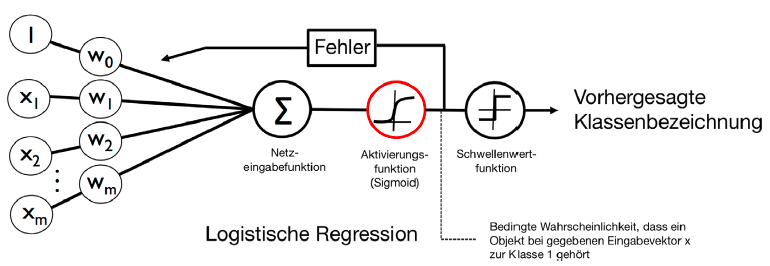

by Raschka - Machine Learning with Python

In [24]:
from sklearn.linear_model import LogisticRegression
# C is the inverse of the regularization parameter lambda
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

C:\Users\weber\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

C:\Users\weber\AppData\Local\Temp\ipykernel_23804\2412815509.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


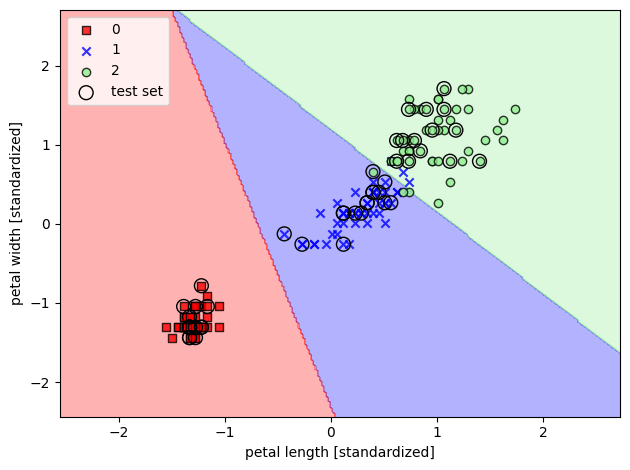

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std)) # stack arrays in sequence vertically (row wise)
y_combined = np.hstack((y_train, y_test)) # stack arrays in sequence horizontally (column wise)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()